# Projeto de Descoberta de Fraudes no consumo de Água com Deep Learning💧

## Empresa parceira: Aegea Saneamento

- Abaixo você irá encontrar descrições sobre a problemática relacionada ao projeto e o nosso objetivo e benefícios que esperamos alcançar. 👇

#### Problemática base 🚨

A fraude no consumo de água é um grande desafio enfrentado pela empresa e qualquer empresa de prestação de serviços de saneamento. Esse problema afeta tanto o faturamento e a arrecadação da empresa, quanto a qualidade do serviço de abastecimento de água.

A fraude acontece quando um consumidor manipula o instrumento de medição de consumo de água, chamado hidrômetro, realiza ligações clandestinas ou qualquer forma de adulteração que reduza ou até mesmo elimine os valores cobrados pelo consumo real.

As práticas acima descritas, além de causarem perdas econômicas para Aegea, também geram impactos na qualidade do abastecimento de água à população, comprometendo a eficiência e a integridade física da infraestrutura de distribuição de água.

#### Impactos 📊

- Danos a tubulações resultando em vazamentos, resultando em perda de água e alteração na pressão da rede de distribuição de água.
- Intermitência no abastecimento de água à população.
- Redução de valores faturados e, consequentemente, diminuição de receita.
- Aumento do risco de contaminação da água, uma vez que métodos fraudulentos não seguem padrões de segurança, possibilitando a presença de contaminantes nas redes de abastecimento.

#### Mediação 🔍

Para combater esse problema, atualmente existem diversas estratégias aplicadas na empresa, desde verificar alterações no padrão de consumo dos clientes até apontamentos de agentes de campo. Em todos os casos existem equipes especializadas em fiscalizar e sanar quaisquer fraudes que sejam detectadas. A atuação dessas equipes é delimitada diariamente por uma lista de alvos para fiscalização.

Diante do cenário acima descrito, deseja-se o desenvolvimento de uma aplicação que melhore a assertividade da atuação da Aegea na detecção de fraudes em seu âmbito de atuação, construindo um modelo de Machine Learning que demonstre eficácia nos processos de negócio.

### Objetivo e Benefícios esperados ✅

- Determinar a probabilidade de um comportamento do consumo ser fraudulento ou não, considerando, de maneira holística, dados históricos de consumo e, caso necessário, a influência de variáveis exógenas, como índices macroeconômicos, climáticos, geográficos, dentre outros.

- Melhorar a capacidade de detecção e predição de fraudes de consumo de água dos consumidores nas áreas de atuação da Aegea. Compreender melhor elementos importantes para detecção e predição de fraudes nos clientes da Aegea

## **Integrantes do Grupo** 🚀
- Camila Anacleto
- Henri Harari
- Patrick Victorino
- Pedro Rezende
- Sophia Dias
- Vitória Rodrigues

---
# Sobre o notebook 🥸

## Objetivo: Pipeline de tratamento 🎯

O objetivo principal do desenvolvimento deste notebook é realizar a construção de uma pipeline de tratamento dos dados, abrangendo um período de 12 meses, juntamente com a base de dados de fraudes identificadas nesse intervalo.

Além disso, a finalidade é termos um dataset final que possa ser inserido em um modelo de Machine Learning para a identificação de fraudes no consumo de água.

# Implementando cuDF

- Aqui fazemos uma verificação para entender se uma GPU está sendo utilizada ou não.
- Para o projeto como um todo, desenvolvemos no Colab Pro, usando o tempo de execução em T4 GPU.

- O principal motivo de estarmos utilizando a GPU é para acelerar o processamento dos dados, visto que o cuDF é uma biblioteca que permite a manipulação de dados em GPU, o que torna o processamento mais rápido.
- Um exemplo claro disso é percebido no momento de aplicação da pipeline de tratamento dos dados, que é um processo que demanda um tempo considerável de execução. Porém, esse processo é fácilmente completado em menos de 1 minuto.

In [1]:
!nvidia-smi

Mon Sep 16 00:29:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P8              15W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%load_ext cudf.pandas

# Importações dos dados e instalações de bibliotecas

In [3]:
%pip install -q -r requirements.txt

In [55]:
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import gdown
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.metrics import BinaryAccuracy, AUC, Precision, Recall, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, Lion
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
tf.random.set_seed(42)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Baixando dados

- Aqui teríamos uma API que tem o recebimento dessa base de dados - pode ser como CSV

In [5]:
# Dados de consumo
!gdown 1cHO3bohcg-MxWj7tREjLjzxVANsYMJSe # 2024
!gdown 1MWbkm7-OIUPM1Bq0Oscij-68cXDcCg_R # 2023

Downloading...
From (original): https://drive.google.com/uc?id=1cHO3bohcg-MxWj7tREjLjzxVANsYMJSe
From (redirected): https://drive.google.com/uc?id=1cHO3bohcg-MxWj7tREjLjzxVANsYMJSe&confirm=t&uuid=b166416c-7ccb-46aa-94b5-cca34424f354
To: /content/CONSUMO_2024.csv
100% 668M/668M [00:02<00:00, 224MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1MWbkm7-OIUPM1Bq0Oscij-68cXDcCg_R
From (redirected): https://drive.google.com/uc?id=1MWbkm7-OIUPM1Bq0Oscij-68cXDcCg_R&confirm=t&uuid=3e853a8d-04c2-4133-aa3a-44e164d32fb2
To: /content/CONSUMO_2023.csv
100% 1.09G/1.09G [00:04<00:00, 270MB/s]


- A base de fraudes não seria incluida como recebimento na API, mas como algo apartado para ser estruturado toda vez que é necessário um retreino da IA

In [6]:
# Fraudes
!gdown 1iZBUheWYMZn1FEgvf5I7ga_w1EEwz6mK

Downloading...
From: https://drive.google.com/uc?id=1iZBUheWYMZn1FEgvf5I7ga_w1EEwz6mK
To: /content/FRAUDES_HIST.csv
100% 97.5M/97.5M [00:00<00:00, 206MB/s]


### Leitura dos arquivos

- CONSUMO

In [7]:
df_2023 = pd.read_csv('/content/CONSUMO_2023.csv', delimiter=';', index_col='Unnamed: 0')
df_2024 = pd.read_csv('/content/CONSUMO_2024.csv', delimiter=';', index_col='Unnamed: 0')
df_consumo = pd.concat([df_2023, df_2024])

- Pegando somente 12 meses de dados

In [8]:
# Encontre o último mês na coluna 'REFERENCIA'
ultimo_mes = df_consumo['REFERENCIA'].max()

# Calcule a data de início para pegar os últimos 12 meses
data_inicio = pd.to_datetime(ultimo_mes) - pd.DateOffset(months=11)

# Converta a coluna 'REFERENCIA' para o tipo datetime
df_consumo['REFERENCIA'] = pd.to_datetime(df_consumo['REFERENCIA'])

# Filtre o DataFrame para pegar os últimos 12 meses
df_12_meses = df_consumo[df_consumo['REFERENCIA'] >= data_inicio]

- FRAUDES

In [9]:
df_fraude = pd.read_csv('/content/FRAUDES_HIST.csv', delimiter=';', index_col='Unnamed: 0')

# Tratamento de dados

Para o nosso projeto, foram cridos pré-processamentos com o intuito de garantir que os dados estejam em um formato adequado para alimentar o modelo de deep learning, otimizando o processo de aprendizado e aumentando a precisão das previsões. Este processo inclui várias etapas cruciais, que são fundamentais para preparar os dados de forma consistente e padronizada, visando garantir que o modelo possa extrair padrões significativos e fornecer previsões mais precisas e confiáveis:

- ~~Transformação para parquet: A etapa de Transformação para Parquet será aplicada para garantir que os dados sejam armazenados em um formato otimizado para eficiência e velocidade. O formato Parquet  facilita o acesso rápido e reduz o espaço em disco, além de melhorar a performance durante o processamento dos dados.~~

* Remoção de colunas: remoção das colunas referentes as features que não serão utilizadas pelo modelo.

* Conversão do tipo de dados: a etapa de Conversão do Tipo de Dados será aplicada para garantir que os dados estejam no formato adequado para processamento pelo modelo de deep learning. Essa etapa assegura que os tipos de dados, como números e datas, estejam corretamente formatados, o que é crucial para evitar erros e para que o modelo possa interpretar e aprender a partir dos dados de forma eficaz.

* Tratamento de Texto: Para uniformizar os dados textuais, todo o texto será convertido para maiúsculas e caracteres especiais serão removidos. Essas transformações são necessárias para garantir consistência na forma como as palavras são processadas, eliminando variações que possam confundir o modelo. Além disso, foi criado uma outra função para fazer o agrupamento de diferentes valores para algumas colunas que possuem muitos valores diferentes, porém, não terão grande impacto no modelo.

* One Hot Encoding: As variáveis categóricas serão convertidas em uma representação numérica utilizando o One Hot Encoding. Essa técnica é crucial para transformar dados categóricos em um formato compatível com o modelo de deep learning, garantindo que as categorias sejam tratadas de maneira uniforme, sem a criação de hierarquias falsas, e permitindo que o modelo interprete cada categoria como uma entidade independente.

* Categoria de consumo: A categoria de consumo foi criada para classificar os consumidores em diferentes grupos, com base em seu padrão de consumo. Essa classificação é essencial para identificar possíveis fraudes, uma vez que consumidores com padrões de consumo semelhantes podem ser comparados entre si, facilitando a detecção de anomalias e comportamentos suspeitos.

* Normalização: A normalização será aplicada para escalar os dados dentro de um intervalo específico, entre 0 e 1. Isso é essencial para assegurar que todas as características tenham a mesma importância durante o treinamento do modelo, evitando que atributos com valores mais altos dominem o aprendizado e ajudando a acelerar a convergência do algoritmo.

* ~~PCA: A Análise de Componentes Principais (PCA) é aplicada para reduzir a dimensionalidade dos dados, mantendo as informações mais relevantes e descartando as informações menos importantes. Essa técnica é crucial para simplificar a complexidade dos dados, acelerar o treinamento do modelo e melhorar a eficiência da previsão, reduzindo o risco de overfitting e aumentando a precisão das previsões.~~

* Redimensionamento do Data Frame: Para se adequar a um formato adequado para rede neural foi realizado o redimensionamento do dataframe, fazendo assim com que cada linha vire uma matrícula diferente, e com que os dados referentes a cada mês vire uma coluna diferente. Assim possibilitando que seja feita uma análise referente a cada matrícula

### Transformação para parquet - Não usada

In [38]:
def transform_load_parquet(df_consumo):
  # Extrair o ano do DataFrame
  # year = df_consumo['REFERENCIA'].dt.year.unique()[0]
  # month = df_consumo['REFERENCIA'].dt.months.unique()[0]
  # file_name = 'CONSUMO_' + str(year) + '.parquet'

  # Salvar como Parquet
  df_consumo.to_parquet(engine='pyarrow', compression='snappy')
  # print(f'Salvo: {file_name}')

- Essa função servirá para juntar o dataset novo com o antigo
- Iremos ignorar o primeiro mês no dataset antigo e adicionar o novo mês, de forma a manter uma faixa de 6 meses de dados

In [39]:
# def load_parquet_files():
#   dataframes_consumo = {}

#   # Concatenar todos os DataFrames em um único DataFrame
#   df_geral = pd.concat(dataframes_consumo_geral, ignore_index=True)

#   return dataframes_consumo_geral, df_geral

### Remoção de colunas

Codigo para remoção de colunas referentes à features que não serão utilizadas para o treinamento do modelo.

- Analisar depois, pois pode ser interessante retirar todas as colunas que possuem ECO
- essas três colunas podem ser interessantes de retornar para o modelo:
 - STA_TROCA
 - EXCECAO
 - STA_ACEITA_LEITURA
 - VOLUME_ESTIMADO_ACUM
 - VOLUME_ESTIMADO

In [40]:
def drop_columns(df, column_name):
  df = df.drop(column_name, axis=1)
  return df

### Conversão dos tipos de dados

In [41]:
def convert_data_types(datasets):
  for column in datasets.select_dtypes(include=['float64', 'int64']).columns:
      if column not in ["COD_LATITUDE", "COD_LONGITUDE"]:
          datasets[column] = datasets[column].astype('Int64')

  # Convert specific object columns to datetime
  if 'REFERENCIA' in datasets.columns:
      datasets['REFERENCIA'] = pd.to_datetime(datasets['REFERENCIA'], errors='coerce')
  if 'DAT_LEITURA' in datasets.columns:
      datasets['DAT_LEITURA'] = pd.to_datetime(datasets['DAT_LEITURA'], errors='coerce')
  return datasets

### Padronização das colunas

Padronização das colunas de texto de forma a evitar possiveis problemas causados por textos mal formatados.

In [42]:
def padronizar_texto(df, column_name):

  # Cria uma cópia da coluna para evitar modificações no DataFrame original
  new_column = df[column_name].copy()

  # Converte todos os textos para maiúsculas
  new_column = new_column.str.upper()

  # Remove caracteres especiais
  new_column = new_column.apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', str(x)))

  return new_column

In [43]:
def agrupar_valores(df, column_name):
  df[column_name] = df[column_name].map(lambda x: 'NORMAL' if x == 'NORMAL' else 'ANORMALIDADE')
  return df[column_name] # Return only the modified column

Vale mencionar que a função realiza tanto a padronização dos textos para maiusculos tanto a remoção de qualquer carctere especial.

### One hot encoding

Codificação One-Hot para garantir que as variáveis categóricas sejam representadas de forma adequada no modelo, evitando que o algoritmo interprete erroneamente as categorias.

In [44]:
def one_hot_encoding(df, column_name):
  df_encoded = pd.get_dummies(df, columns=[column_name], prefix=[column_name])
  return df_encoded

### Criação de categoria de consumo

Tramento para criação de categorias de consumo, que podem sem utilizadas para ánalise

In [45]:
def categorizar_consumo(df, column_name):


  # Criação novas colunas para as categorias de consumo
  df['Consumo_Alto'] = 0
  df['Consumo_Medio'] = 0
  df['Consumo_Baixo'] = 0

  # Categorizando o consumo
  df.loc[df[column_name] > 0.7, 'Consumo_Alto'] = 1
  df.loc[(df[column_name] >= 0.2) & (df[column_name] <= 0.7), 'Consumo_Medio'] = 1
  df.loc[df[column_name] < 0.2, 'Consumo_Baixo'] = 1

  return df

### Normalização

Normalização dos dados para garantir que todas as variáveis tivessem uma escala comparável, evitando que alguma variável dominasse o modelo devido a valores mais altos.

In [46]:
def normalize_column(df, column_name):
    # Cria uma instância do RobustScaler
    scaler = RobustScaler()

    # Ajusta o scaler à coluna e transforma os dados
    df_normalized = df.copy()
    df_normalized[column_name] = scaler.fit_transform(df[[column_name]])

    return df_normalized[column_name]

### PCA -> melhorar a estruturação para a próxima sprint

In [47]:
def apply_pca(df_CONSUMO, colunas_features):
  pca = PCA(n_components=3)
  df_CONSUMO[colunas_features] = pca.fit_transform(df_CONSUMO[colunas_features])
  print(f'Variância explicada por cada componente: {pca.explained_variance_ratio_}')

### Redimensionamento do dataframe:

Codigo para redimensionar a tabela, visando tranformar cada linha do dataframe em uma matricula, e cada mês em uma coluna propria no dataframe:


In [48]:
def redimensionar_dataframe(df, coluna_data, coluna_matricula, colunas_features):
    # Converte a coluna de data para datetime
    df[coluna_data] = pd.to_datetime(df[coluna_data])

    # Determina a data mais recente (M) no DataFrame
    data_maxima = df[coluna_data].max()

    # Calcula a datas do intervalo
    data_limite = data_maxima - pd.DateOffset(months=5) # vamos mudar a quantidade de meses que iremos rodar # Mude aqui para alterar o range de datas

    # Filtra o DataFrame para manter apenas as datas definidas
    df = df[(df[coluna_data] >= data_limite) & (df[coluna_data] <= data_maxima)]

    # Cria um dicionário para armazenar os dados redimensionados
    dados_redimensionados = {}

    # Identifica as colunas que não estão nas colunas_features
    colunas_estaticas = [col for col in df.columns if col not in colunas_features and col not in [coluna_data, coluna_matricula]]

    # Itera sobre as matrículas únicas
    for matricula in df[coluna_matricula].unique():
        # Filtra o DataFrame para a matrícula atual
        df_matricula = df[df[coluna_matricula] == matricula]
        # Cria um dicionário para a matrícula atual
        dados_matricula = {coluna_matricula: matricula}
        # Adiciona as colunas estáticas
        for coluna in colunas_estaticas:
            dados_matricula[coluna] = df_matricula[coluna].iloc[0]
        for coluna in colunas_features:
            # Cria uma coluna para cada mês
            for i, data in enumerate(pd.date_range(data_limite, data_maxima, freq='M')):
                valor = df_matricula.loc[df_matricula[coluna_data] == data, coluna].iloc[0] if data in df_matricula[coluna_data].values else 0
                dados_matricula[f"{coluna}_M-{i}"] = valor
        # Adiciona os dados da matrícula ao dicionário principal
        dados_redimensionados[matricula] = dados_matricula

    # Cria um novo DataFrame a partir do dicionário redimensionado
    df_redimensionado = pd.DataFrame.from_dict(dados_redimensionados, orient='index')
    # Substitui todos os NaN por 0 no DataFrame final
    df_redimensionado.fillna(0, inplace=True)
    return df_redimensionado

# Construindo Pipe de tratamento

Para garantir que os dados sejam processados corretamente, foi desenvolvida uma pipeline de pré-processamento robusta e flexível, capaz de se adaptar a diferentes data frames. Essa pipeline foi projetada para executar de forma automática todos os tratamentos necessários, conforme descrito no tópico de pré-processamento de dados. Com isso, assegura-se que cada conjunto de dados seja tratado de maneira adequada e consistente, independentemente das suas particularidades ou formatos, assim sendo adaptavel as nescecidades de cada dataframe e possibilitando a adição de novas bases ao projeto.

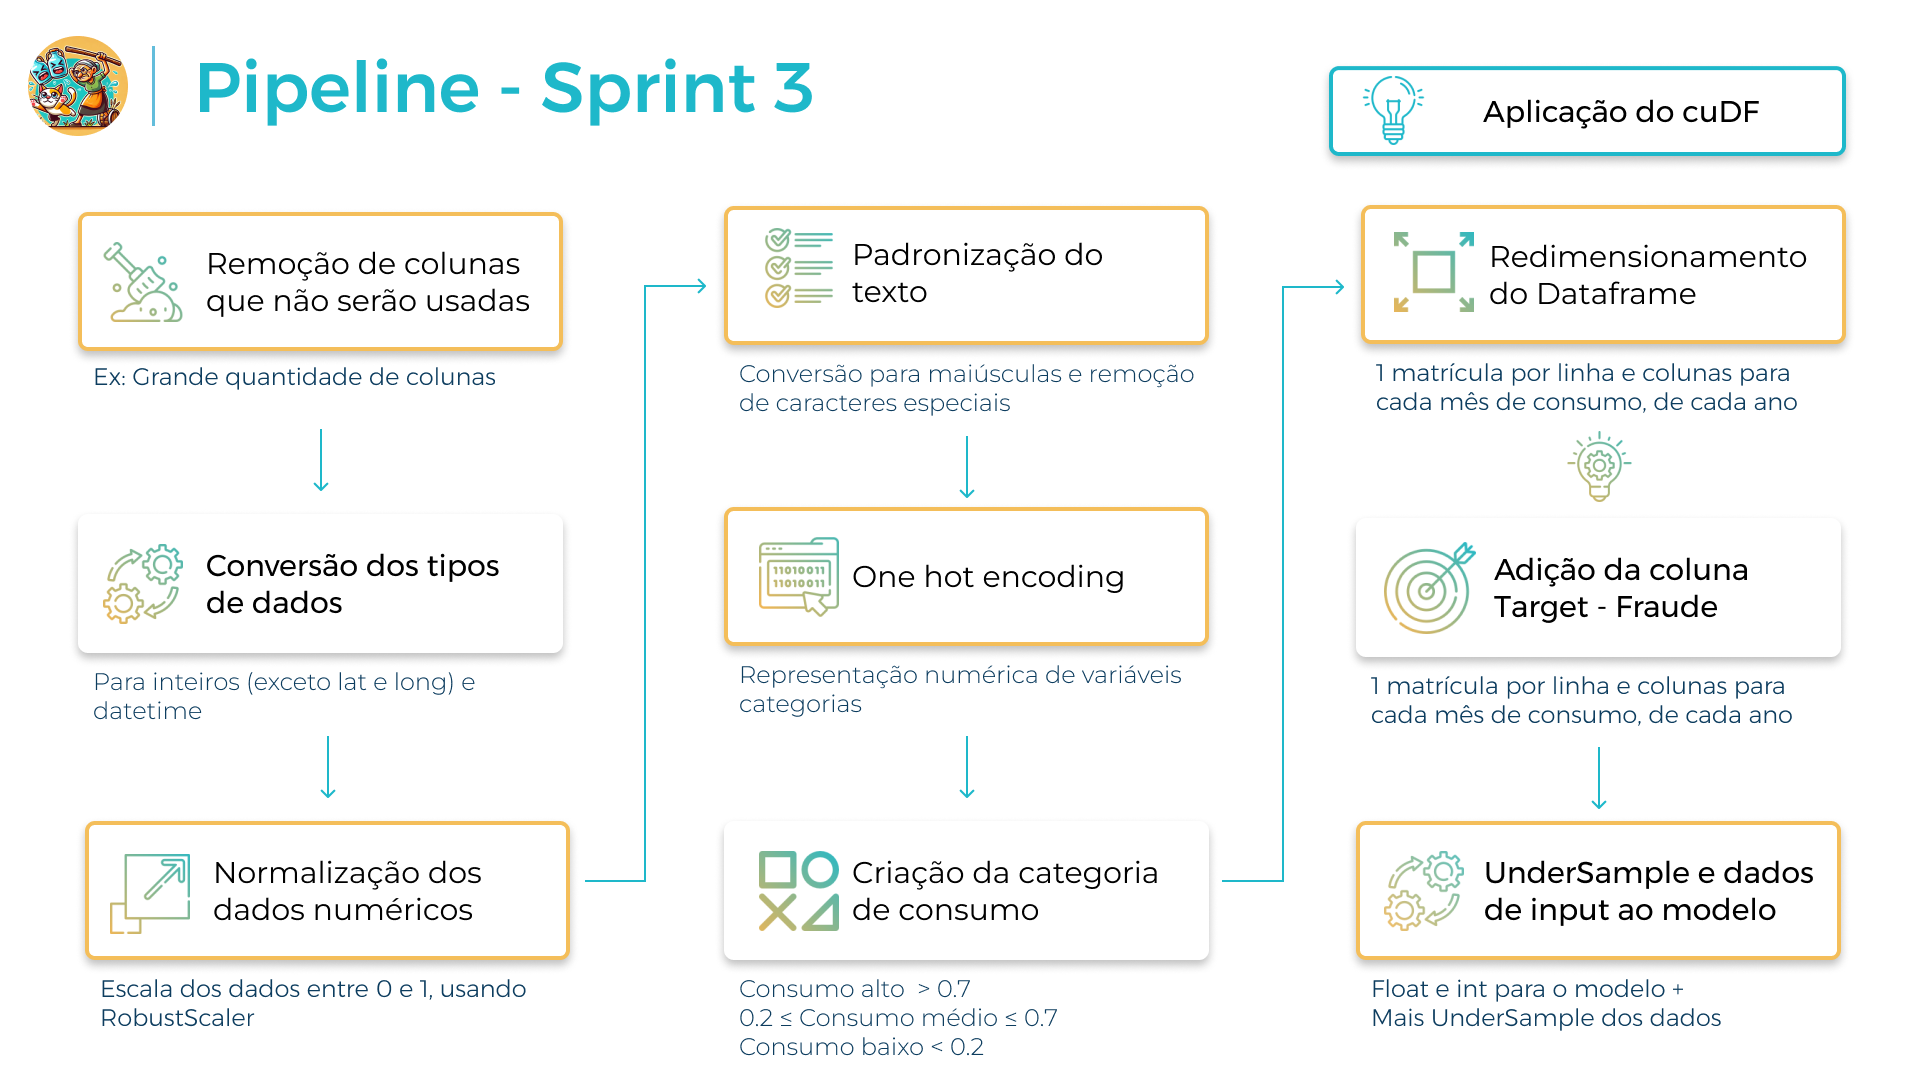

In [49]:
def pipeline_tratamento(df_CONSUMO, colunas_remover, colunas_normalizar, colunas_padronizar, colunas_agrupamento, colunas_onehot, coluna_consumo, coluna_data, coluna_matricula, colunas_features):
  # A função de parquet foi retirada por enquanto
  # dataset_parquet = transform_load_parquet(dataset)

  for coluna_drop in colunas_remover:
      df_CONSUMO = drop_columns(df_CONSUMO, coluna_drop)

  df_CONSUMO = convert_data_types(df_CONSUMO)

  # Agrupamento de texto
  df_CONSUMO[colunas_agrupamento] = agrupar_valores(df_CONSUMO, colunas_agrupamento)

  # Padronização de texto
  for coluna_padrao in colunas_padronizar:
      df_CONSUMO[coluna_padrao] = padronizar_texto(df_CONSUMO, coluna_padrao)

  # One-hot encoding
  for coluna_one in colunas_onehot:
      df_CONSUMO = one_hot_encoding(df_CONSUMO, coluna_one)

  # Criação de categorias de consumo
  df_CONSUMO = categorizar_consumo(df_CONSUMO, coluna_consumo)

  # Normalização
  for coluna_norm in colunas_normalizar:
      df_CONSUMO[coluna_norm] = normalize_column(df_CONSUMO, coluna_norm)

  # PCA features -> melhorar para próxima sprint
  # for coluna_pca in colunas_features:
  #     df_CONSUMO[coluna_pca] = apply_pca(df_CONSUMO, coluna_pca)

  # Redimensionamento do DataFrame
  df_CONSUMO = redimensionar_dataframe(df_CONSUMO, coluna_data, coluna_matricula, colunas_features)

  return df_CONSUMO

# Aplicando pipe de tratamento

Abaixo é possivel visualizar a aplicação da pipe descrita no topico anterior:

In [56]:
%%time
df_CONSUMO = df_12_meses.copy()
# Começo do tratamento
colunas_remover =  ['EMP_CODIGO', 'COD_GRUPO', 'COD_SETOR_COMERCIAL', 'ECO_OUTRAS', 'FATURADO_MEDIA', 'COD_LEITURA_INF_1', 'COD_LEITURA_INF_2', 'COD_LEITURA_INF_3', 'COD_LATITUDE', 'COD_LONGITUDE', 'LTR_ATUAL', 'LTR_COLETADA', 'HORA_LEITURA', 'DAT_LEITURA', 'COD_LEITURA_INT', 'STA_ACEITA_LEITURA', 'STA_TROCA', 'EXCECAO', 'VOLUME_ESTIMADO', 'VOLUME_ESTIMADO_ACUM', 'NUM_QUADRA', 'COD_ROTA_LEITURA', 'SUB_CATEGORIA'] # colunas que não quero no dataset
colunas_normalizar = ['CONS_MEDIDO'] # colunas que quero fazer o min e max, tirando os outliers.
colunas_agrupamento = ['DSC_OCORRENCIA']

# Aqui foi retirado a coluna de sub-categoria para ser feito uma análise mais profunda dos dados presentes nela e como isso pode interferir no modelo
colunas_padronizar = ['DSC_SIMULTANEA', 'DSC_OCORRENCIA', 'TIPO_LIGACAO', 'CATEGORIA'] #, 'SUB_CATEGORIA' / padronização do texto = regex
colunas_onehot = ['DSC_SIMULTANEA', 'DSC_OCORRENCIA', 'TIPO_LIGACAO', 'CATEGORIA'] #, 'SUB_CATEGORIA' / para a função de one hot, é melhor usar para texto

# Nova classe de consumo [alto, medio, baixo]
coluna_consumo = 'CONS_MEDIDO' # coluna de referencia de consumo

# Redimensionamento
coluna_data = 'REFERENCIA' # coluna referencia de datas
coluna_matricula = 'MATRICULA' # coluna de referencia de id
colunas_features = ['CONS_MEDIDO'] #,'LTR_ATUAL','LTR_COLETADA'] # aqui para features é onde eu uso as colunas com números, que estão associadas a cada mês

df_pipe = pipeline_tratamento(df_CONSUMO, colunas_remover, colunas_normalizar, colunas_padronizar, colunas_agrupamento, colunas_onehot, coluna_consumo, coluna_data, coluna_matricula, colunas_features)

df_pipe.head()

CPU times: user 32.8 s, sys: 4.26 s, total: 37.1 s
Wall time: 36.7 s


,REFERENCIA,MATRICULA,SEQ_RESPONSAVEL,ECO_RESIDENCIAL,ECO_COMERCIAL,ECO_INDUSTRIAL,ECO_PUBLICA,DIAS_LEITURA,CONS_MEDIDO,DSC_SIMULTANEA_00NAOENTREGUE,...,DSC_OCORRENCIA_NORMAL,TIPO_LIGACAO_CONSUMOFIXO,TIPO_LIGACAO_HIDROMETRADO,CATEGORIA_COMERCIAL,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,Consumo_Alto,Consumo_Medio,Consumo_Baixo
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3,2023-12-01,17516238,210259,1,0,0,0,31,-0.615385,True,...,True,True,False,False,False,False,True,0,0,1
5,2023-10-01,17090191,1247377,1,0,0,0,32,-0.615385,False,...,True,False,True,False,False,False,True,0,0,1
8,2023-09-01,17797005,378315,1,0,0,0,29,-0.615385,False,...,False,False,True,False,False,False,True,0,0,1
9,2023-11-01,17838226,397005,1,0,0,0,31,-0.615385,False,...,True,True,False,False,False,False,True,0,0,1
15,2023-12-01,17452828,196720,1,0,0,0,31,-0.615385,False,...,True,True,False,False,False,False,True,0,0,1


In [57]:
df_pipe.shape

(4338992, 46)

In [58]:
df_pipe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338992 entries, 3 to 2805907
Data columns (total 46 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   REFERENCIA                                datetime64[ns]
 1   MATRICULA                                 Int64         
 2   SEQ_RESPONSAVEL                           Int64         
 3   ECO_RESIDENCIAL                           Int64         
 4   ECO_COMERCIAL                             Int64         
 5   ECO_INDUSTRIAL                            Int64         
 6   ECO_PUBLICA                               Int64         
 7   DIAS_LEITURA                              Int64         
 8   CONS_MEDIDO                               float64       
 9   DSC_SIMULTANEA_00NAOENTREGUE              bool          
 10  DSC_SIMULTANEA_01EMMAOS                   bool          
 11  DSC_SIMULTANEA_02CAIXACORREIO             bool          
 12  DSC_SIMULTANEA_03VI

In [59]:
# Convert boolean values to 0 or 1
for col in df_pipe.select_dtypes(include=['bool']).columns:
  df_pipe[col] = df_pipe[col].astype(int)

# Convert int64 and Int64 to float32
for col in df_pipe.select_dtypes(include=['int64', 'Int64', 'int', 'float64']).columns:
  if col not in ['REFERENCIA', 'MATRICULA', 'SEQ_RESPONSAVEL']:
    df_pipe[col] = df_pipe[col].astype('float32')

# Adição da coluna target - FRAUDE

Além do tratamento, tambem e nescessario adicionar a nossa coluna target do modelo, no nosso caso e se uma matricula já fraudou ou não. E para isso e nescessario juntar a tabela de consumo e de fraudes:

In [60]:
df_fraude = df_fraude.copy()
df_fraude = convert_data_types(df_fraude)
# Cria um conjunto com as matrículas fraudulentas
matriculas_fraudulentas = set(df_fraude['MATRICULA'])

# Cria a coluna 'fraude' no df_pipe_teste e inicializa com 0
df_pipe['fraude'] = 0

# Define o valor 1 para as matrículas presentes no conjunto de matrículas fraudulentas
df_pipe.loc[df_pipe['MATRICULA'].isin(matriculas_fraudulentas), 'fraude'] = 1

In [61]:
df_pipe['fraude'].value_counts()

,count
fraude,
0,2948614
1,1390378


# Aplicando o UnderSample

- Aqui estamos aplicando o Undersample, uma forma de equilibrar a disparidade de valores não fraudes e fraudes, de forma a passar uma visão mais uniforme para o modelo

In [63]:
# Separando as features e o alvo
take_off_columns = ['fraude']
X = df_pipe.drop(take_off_columns, axis=1)
y = df_pipe['fraude']

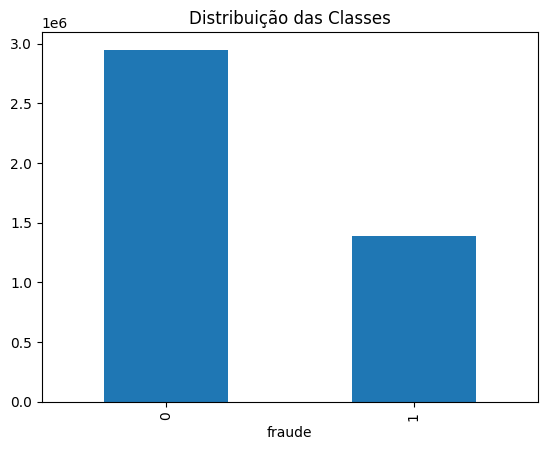

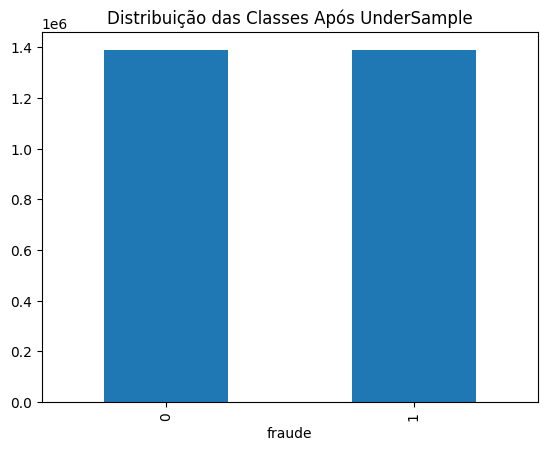

In [64]:
# Analisando o desequilíbrio das classes
fig = px.bar(df_pipe['fraude'].value_counts().reset_index(), x='index', y='fraude', title='Distribuição das Classes')
fig.show()

# Aplicando SMOTE para balanceamento
smote = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verificando a nova distribuição das classes
fig_balanced = px.bar(y_balanced.value_counts().reset_index(), x='index', y='fraude', title='Distribuição das Classes Após UnderSample')
fig_balanced.show()

In [67]:
# Criando um novo DataFrame com os dados balanceados
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced, columns=['fraude'])], axis=1)

# Salvando novo dataset

In [68]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
# Salvando para parquet
df_balanced.to_parquet('df_pipe.parquet')

- Esse dataset será utilizado no modelo de Rede Neural que está sendo construído em outro notebook